<a href="https://colab.research.google.com/github/MarioAderman/Open-Interface/blob/main/An%C3%A1lisis_de_Ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# import the necessary libraries

In [24]:
df = pd.read_csv('/content/inventario.csv')
df.head()

# load the dataset

,marca,modelo,año,versión,tipo_vehículo,color_exterior,costo,gastos,precio_venta,fecha_compra,fecha_venta
0,Ford,Ranger,2019,XLT,Pickup,azul,340000,24700,439000,10/11/2021,05/01/2022
1,Toyota,Yaris,2019,S,Hatchback,plata,200000,22550,259000,23/11/2021,07/01/2022
2,Renault,Kangoo,2017,Express,Cargo Van,blanco,115000,26000,169000,24/11/2021,10/01/2022
3,Volkswagen,Jetta,2019,Comfortline,Sedan,negro,250000,11800,329000,21/12/2021,17/01/2022
4,Dodge,RAM,2016,Laramie 4X4,Pickup,blanco,530000,2500,560000,11/01/2022,12/01/2022


In [25]:
#df.drop(columns=['Unnamed: 11'], inplace=True)
#df.head()

In [26]:
df.shape

(143, 11)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   marca           143 non-null    object
 1   modelo          143 non-null    object
 2   año             143 non-null    int64 
 3   versión         141 non-null    object
 4   tipo_vehículo   142 non-null    object
 5   color_exterior  141 non-null    object
 6   costo           143 non-null    int64 
 7   gastos          143 non-null    int64 
 8   precio_venta    143 non-null    int64 
 9   fecha_compra    142 non-null    object
 10  fecha_venta     143 non-null    object
dtypes: int64(4), object(7)
memory usage: 12.4+ KB


In [28]:
# Filling NA values with crossed date values, i.e. tiempo_inventario = 0
df['fecha_compra'] = df['fecha_compra'].fillna(df['fecha_venta'])
df['fecha_venta'] = df['fecha_venta'].fillna(df['fecha_compra'])
df['fecha_compra'].isnull().sum()

np.int64(0)

In [29]:
# Plot styling
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (8, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [30]:
# Dates breakdown into day, month and year
df['fecha_compra'] = pd.to_datetime(df['fecha_compra'], dayfirst=True)
df['fecha_venta'] = pd.to_datetime(df['fecha_venta'], dayfirst=True)

df['dia_compra'] = df['fecha_compra'].dt.day
df['mes_compra'] = df['fecha_compra'].dt.month
df['año_compra'] = df['fecha_compra'].dt.year

df['dia_venta'] = df['fecha_venta'].dt.day
df['mes_venta'] = df['fecha_venta'].dt.month
df['año_venta'] = df['fecha_venta'].dt.year

print(df[['fecha_compra', 'dia_compra', 'mes_compra', 'año_compra', 'fecha_venta', 'dia_venta', 'mes_venta', 'año_venta']].head())

  fecha_compra  dia_compra  mes_compra  año_compra fecha_venta  dia_venta  \
0   2021-11-10          10          11        2021  2022-01-05          5   
1   2021-11-23          23          11        2021  2022-01-07          7   
2   2021-11-24          24          11        2021  2022-01-10         10   
3   2021-12-21          21          12        2021  2022-01-17         17   
4   2022-01-11          11           1        2022  2022-01-12         12   

   mes_venta  año_venta  
0          1       2022  
1          1       2022  
2          1       2022  
3          1       2022  
4          1       2022  


In [31]:
# Replacing Dodge and RAM values to unify results as some RAM vehicles were wrongly labeled as Dodge
df['marca'] = df['marca'].replace(['Dodge', 'RAM'], 'Stellantis (Dodge/RAM)')

In [32]:
# Replacing champaña and arena values (yellowish tones) to unify results as a unique color amarillo
df['color_exterior'] = df['color_exterior'].replace(['arena', 'champaña'], 'amarillo')

In [33]:
df['tiempo_inventario'] = (df['fecha_venta'] - df['fecha_compra']).dt.days

# Check for negative values and replace them with NaN or another suitable value
df['tiempo_inventario'] = df['tiempo_inventario'].apply(lambda x: x if x >= 0 else pd.NA)
df['tiempo_inventario'].isnull().sum()

np.int64(0)

In [34]:
# Financial calculation
df['costo_total'] = df['costo'] + df['gastos']
df['utilidad'] = df['precio_venta'] - df['costo_total']
df['porcentaje_utilidad'] = (df['utilidad'] / df['costo_total']) * 100

In [35]:
df = df.drop(79) # Removing Tahoe record
print(df.to_string())

                      marca          modelo   año            versión tipo_vehículo color_exterior    costo  gastos  precio_venta fecha_compra fecha_venta  dia_compra  mes_compra  año_compra  dia_venta  mes_venta  año_venta  tiempo_inventario  costo_total  utilidad  porcentaje_utilidad
0                      Ford          Ranger  2019                XLT        Pickup           azul   340000   24700        439000   2021-11-10  2022-01-05          10          11        2021          5          1       2022                 56       364700     74300            20.372909
1                    Toyota           Yaris  2019                  S     Hatchback          plata   200000   22550        259000   2021-11-23  2022-01-07          23          11        2021          7          1       2022                 45       222550     36450            16.378342
2                   Renault          Kangoo  2017            Express     Cargo Van         blanco   115000   26000        169000   2021-11-24 

In [36]:
df.head()

,marca,modelo,año,versión,tipo_vehículo,color_exterior,costo,gastos,precio_venta,fecha_compra,...,dia_compra,mes_compra,año_compra,dia_venta,mes_venta,año_venta,tiempo_inventario,costo_total,utilidad,porcentaje_utilidad
0,Ford,Ranger,2019,XLT,Pickup,azul,340000,24700,439000,2021-11-10,...,10,11,2021,5,1,2022,56,364700,74300,20.372909
1,Toyota,Yaris,2019,S,Hatchback,plata,200000,22550,259000,2021-11-23,...,23,11,2021,7,1,2022,45,222550,36450,16.378342
2,Renault,Kangoo,2017,Express,Cargo Van,blanco,115000,26000,169000,2021-11-24,...,24,11,2021,10,1,2022,47,141000,28000,19.858156
3,Volkswagen,Jetta,2019,Comfortline,Sedan,negro,250000,11800,329000,2021-12-21,...,21,12,2021,17,1,2022,27,261800,67200,25.668449
4,Stellantis (Dodge/RAM),RAM,2016,Laramie 4X4,Pickup,blanco,530000,2500,560000,2022-01-11,...,11,1,2022,12,1,2022,1,532500,27500,5.164319


In [37]:
df['año'] = df['año'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 142
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   marca                142 non-null    object        
 1   modelo               142 non-null    object        
 2   año                  142 non-null    object        
 3   versión              140 non-null    object        
 4   tipo_vehículo        141 non-null    object        
 5   color_exterior       140 non-null    object        
 6   costo                142 non-null    int64         
 7   gastos               142 non-null    int64         
 8   precio_venta         142 non-null    int64         
 9   fecha_compra         142 non-null    datetime64[ns]
 10  fecha_venta          142 non-null    datetime64[ns]
 11  dia_compra           142 non-null    int32         
 12  mes_compra           142 non-null    int32         
 13  año_compra           142 non-null    int

In [38]:
df.describe()

,costo,gastos,precio_venta,fecha_compra,fecha_venta,dia_compra,mes_compra,año_compra,dia_venta,mes_venta,año_venta,tiempo_inventario,costo_total,utilidad,porcentaje_utilidad
count,1.420000e+02,142.000000,1.420000e+02,142,142,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,1.420000e+02,142.000000,142.000000
mean,3.270528e+05,19896.478873,3.890669e+05,2023-07-25 14:01:41.408450816,2023-09-11 16:23:39.718309888,15.464789,6.112676,2023.098592,15.838028,5.570423,2023.274648,48.098592,3.469493e+05,42117.605634,12.882099
min,1.000000e+05,0.000000,1.450000e+05,2021-11-10 00:00:00,2022-01-05 00:00:00,1.000000,1.000000,2021.000000,1.000000,1.000000,2022.000000,0.000000,1.245000e+05,0.000000,0.000000
25%,2.100000e+05,10987.500000,2.690000e+05,2022-07-14 12:00:00,2022-09-04 00:00:00,9.000000,3.000000,2022.000000,9.250000,3.000000,2022.000000,11.000000,2.329750e+05,25000.000000,8.745268
50%,2.900000e+05,17575.000000,3.490000e+05,2023-07-06 12:00:00,2023-08-05 12:00:00,15.000000,6.000000,2023.000000,14.000000,5.000000,2023.000000,25.000000,3.040000e+05,37250.000000,13.659228
75%,3.900000e+05,26000.000000,4.492500e+05,2024-08-28 18:00:00,2024-09-19 00:00:00,22.000000,9.000000,2024.000000,22.000000,9.000000,2024.000000,52.250000,4.047375e+05,48425.000000,17.064606
max,1.160000e+06,97550.000000,1.219000e+06,2025-04-25 00:00:00,2025-05-30 00:00:00,31.000000,12.000000,2025.000000,31.000000,12.000000,2025.000000,519.000000,1.180500e+06,222600.000000,26.381029
std,1.840353e+05,13916.084178,1.995145e+05,NaN,NaN,8.459886,3.523173,1.106460,8.638227,3.361015,1.079430,70.385898,1.825303e+05,29468.597421,6.243516


In [39]:
print('Total de versiones en el inventario:')
print(df['versión'].nunique())

Total de versiones en el inventario:
64


In [40]:
print('Total de modelos en el inventario:')
print(df['modelo'].nunique())

Total de modelos en el inventario:
71


## Análisis de Grok

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [42]:
# Categorical breakdowns (top values)
for col in ['año', 'marca', 'tipo_vehículo', 'color_exterior']:
    print(f"\n{col} breakdown:\n", df[col].value_counts(normalize=True).head(5))  # % shares

# Numerical summaries (custom for derived vars)
numerical_cols = ['costo', 'gastos', 'precio_venta', 'tiempo_inventario', 'utilidad', 'porcentaje_utilidad', 'costo_total']
print("\nNumerical summaries:\n", df[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max']))

# Missing values check
print("\nMissing %:\n", df.isnull().mean() * 100)


año breakdown:
 año
2019    0.161972
2018    0.147887
2021    0.126761
2020    0.112676
2023    0.105634
Name: proportion, dtype: float64

marca breakdown:
 marca
Mazda                     0.169014
Volkswagen                0.119718
Stellantis (Dodge/RAM)    0.084507
Jeep                      0.070423
Toyota                    0.063380
Name: proportion, dtype: float64

tipo_vehículo breakdown:
 tipo_vehículo
SUV          0.354610
Sedan        0.304965
Hatchback    0.163121
Pickup       0.134752
Cargo Van    0.014184
Name: proportion, dtype: float64

color_exterior breakdown:
 color_exterior
blanco    0.314286
gris      0.228571
plata     0.192857
rojo      0.150000
azul      0.064286
Name: proportion, dtype: float64

Numerical summaries:
                costo        gastos  precio_venta  tiempo_inventario  \
mean    3.270528e+05  19896.478873  3.890669e+05          48.098592   
median  2.900000e+05  17575.000000  3.490000e+05          25.000000   
std     1.840353e+05  13916.084178  1

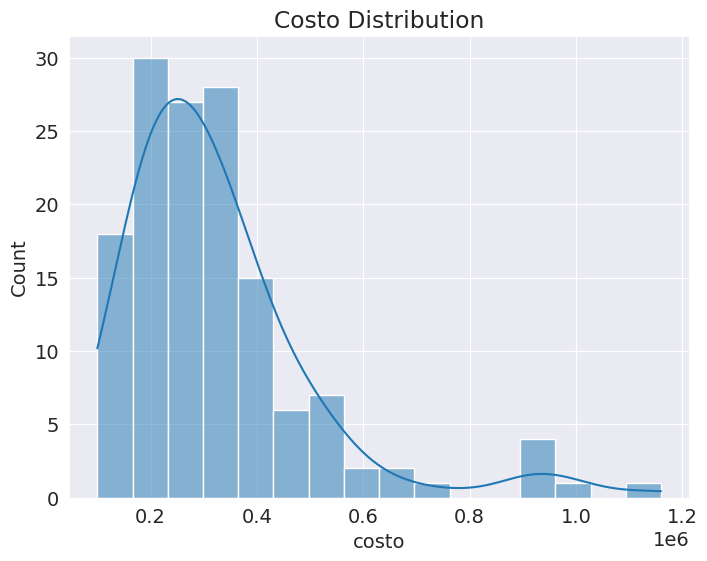

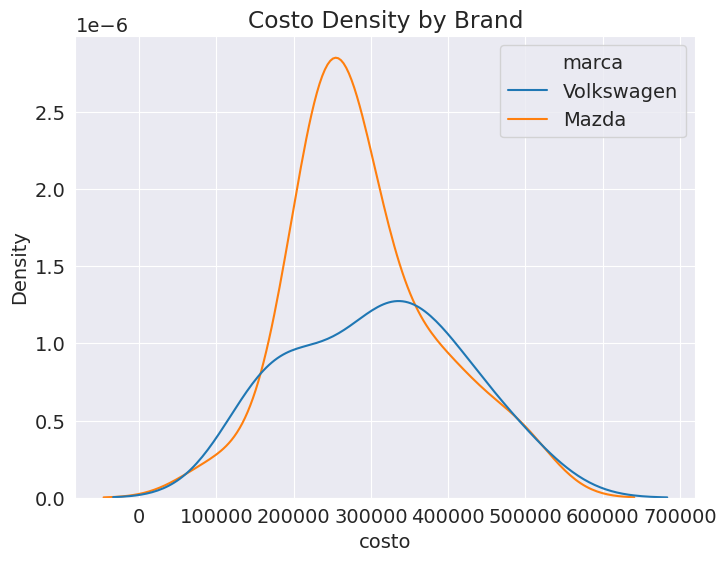

In [43]:
# Histograms for key numericals
sns.histplot(df['costo'], kde=True)  # Right-skewed
plt.title('Costo Distribution')
plt.show()

# By brand (e.g., your VW/Mazda)
sns.kdeplot(data=df[df['marca'].isin(['Volkswagen', 'Mazda'])], x='costo', hue='marca')
plt.title('Costo Density by Brand')
plt.show()

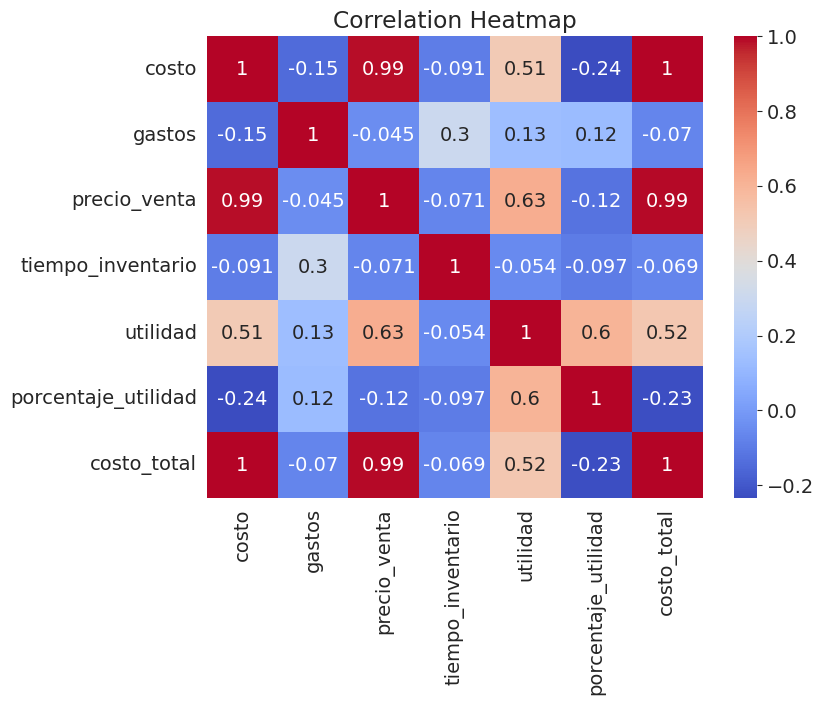

In [44]:
# Scatter with hue
px.scatter(df, x='costo', y='utilidad', color='tipo_vehículo', title='Utilidad vs Costo by Type').show()

# Correlation heatmap
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [45]:
# Example: ANOVA for utilidad by tipo_vehículo
groups = [group['utilidad'].values for name, group in df.groupby('tipo_vehículo')]
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA for utilidad by tipo_vehículo: F={f_stat:.2f}, p={p_val:.4f}")

# Full loop like your original
categoricals = ['tipo_vehículo', 'marca', 'color_exterior']
for cat in categoricals:
    for num in numerical_cols:  # Skip año
        model = ols(f'{num} ~ C({cat})', data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print(f"ANOVA {num} by {cat}: F={anova_table['F'][0]:.2f}, p={anova_table['PR(>F)'][0]:.4f}")

ANOVA for utilidad by tipo_vehículo: F=2.89, p=0.0053
ANOVA costo by tipo_vehículo: F=9.27, p=0.0000
ANOVA gastos by tipo_vehículo: F=3.11, p=0.0030
ANOVA precio_venta by tipo_vehículo: F=9.32, p=0.0000
ANOVA tiempo_inventario by tipo_vehículo: F=8.11, p=0.0000
ANOVA utilidad by tipo_vehículo: F=2.89, p=0.0053
ANOVA porcentaje_utilidad by tipo_vehículo: F=1.13, p=0.3451
ANOVA costo_total by tipo_vehículo: F=9.16, p=0.0000
ANOVA costo by marca: F=1.94, p=0.0150
ANOVA gastos by marca: F=1.01, p=0.4567
ANOVA precio_venta by marca: F=2.01, p=0.0111
ANOVA tiempo_inventario by marca: F=0.53, p=0.9511
ANOVA utilidad by marca: F=1.37, p=0.1517
ANOVA porcentaje_utilidad by marca: F=0.95, p=0.5213
ANOVA costo_total by marca: F=1.96, p=0.0141
ANOVA costo by color_exterior: F=2.14, p=0.0533


/tmp/ipython-input-45-925633657.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-45-925633657.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-45-925633657.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-45-925633657.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

ANOVA gastos by color_exterior: F=1.39, p=0.2243
ANOVA precio_venta by color_exterior: F=2.73, p=0.0155
ANOVA tiempo_inventario by color_exterior: F=0.79, p=0.5803
ANOVA utilidad by color_exterior: F=4.58, p=0.0003
ANOVA porcentaje_utilidad by color_exterior: F=0.59, p=0.7403
ANOVA costo_total by color_exterior: F=2.23, p=0.0439


/tmp/ipython-input-45-925633657.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-45-925633657.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-45-925633657.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

/tmp/ipython-input-45-925633657.py:12: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as label

In [46]:
df[numerical_cols]

,costo,gastos,precio_venta,tiempo_inventario,utilidad,porcentaje_utilidad,costo_total
0,340000,24700,439000,56,74300,20.372909,364700
1,200000,22550,259000,45,36450,16.378342,222550
2,115000,26000,169000,47,28000,19.858156,141000
3,250000,11800,329000,27,67200,25.668449,261800
4,530000,2500,560000,1,27500,5.164319,532500
...,...,...,...,...,...,...,...
138,130000,12500,166500,83,24000,16.842105,142500
139,1160000,20500,1219000,0,38500,3.261330,1180500
140,900000,4000,1000000,0,96000,10.619469,904000
141,325000,11550,359000,0,22450,6.670628,336550


In [47]:
# Your original PCA setup (copied for completeness—run this first)
numerical_cols = ['costo', 'precio_venta', 'utilidad', 'tiempo_inventario', 'gastos', 'porcentaje_utilidad']  # Note: I dropped 'costo_total' if not needed, but add back if you want
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])  # Scale the original numericals

pca = PCA(n_components=2)  # Reduce to 2D
pca_result = pca.fit_transform(scaled_data)  # This is the 2D array of PC values

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])  # Temp DF for PCs

categorical_cols_for_color = ['marca', 'color_exterior', 'tipo_vehículo']

for color_col in categorical_cols_for_color:
    if color_col in df.columns:
        pca_df[color_col] = df[color_col].values  # Add categorical for hue (use .values to match indices)

        fig = px.scatter(pca_df, x='PC1', y='PC2', color=color_col,
                         title=f'PCA of Numerical Variables by {color_col}')
        fig.update_layout(
            xaxis_title="Principal Component 1",
            yaxis_title="Principal Component 2"
        )
        fig.show()
    else:
        print(f"Column '{color_col}' not found in DataFrame. Skipping plot.")

print(f'Variance explained: {pca.explained_variance_ratio_}')  # How much data is captured

# Now, add clustering—fit on pca_result, then MERGE clusters back to original df
kmeans = KMeans(n_clusters=3, random_state=42)  # 3 clusters as example; tweak as needed
df['cluster'] = kmeans.fit_predict(pca_result)  # Assign clusters directly to original df (indices match)

# Plot the clusters (using pca_df for viz, but pull cluster from df)
pca_df['cluster'] = df['cluster'].values  # Sync cluster to pca_df for plotting
px.scatter(pca_df, x='PC1', y='PC2', color='cluster', title='PCA with K-Means Clusters').show()

# Now groupby on clusters using original numericals (now possible since clusters are in df)
print("\nCluster Profiles (Means):\n", df.groupby('cluster')[numerical_cols + ['costo_total']].mean())  # Include costo_total if derived

# Optional: Add hue by a categorical for more insight
px.scatter(pca_df, x='PC1', y='PC2', color='cluster', symbol='tipo_vehículo', title='Clusters with Tipo_Vehículo Overlay').show()

Variance explained: [0.40933984 0.25911792]



Cluster Profiles (Means):
                  costo  precio_venta       utilidad  tiempo_inventario  \
cluster                                                                  
0        369456.521739  4.044565e+05   22372.826087          49.369565   
1        263516.666667  3.337833e+05   46833.888889          46.255556   
2        955000.000000  1.100333e+06  122750.000000          66.000000   

               gastos  porcentaje_utilidad    costo_total  
cluster                                                    
0        12627.173913             6.082958  382083.695652  
1        23432.777778            16.357552  286949.444444  
2        22583.333333            12.877059  977583.333333  


                   utilidad       porcentaje_utilidad      
                       mean count                mean count
tipo_vehículo                                              
Cargo Van      35450.000000     2           21.455139     2
Coupe          65100.000000     1           21.351263     1
Crossover      29500.000000     1            9.849750     1
Deportivo      67900.000000     1           19.121374     1
Hatchback      29013.043478    23           12.348223    23
Minivan        12950.000000     1            7.526882     1
Pickup         58784.210526    19           11.763761    19
SUV            50133.000000    50           12.571853    50
Sedan          33186.046512    43           13.586911    43
Empty DataFrame
Columns: [marca, modelo, año, versión, tipo_vehículo, color_exterior, costo, gastos, precio_venta, fecha_compra, fecha_venta, dia_compra, mes_compra, año_compra, dia_venta, mes_venta, año_venta, tiempo_inventario, costo_total, utilidad, porcentaje_utilidad, cluste

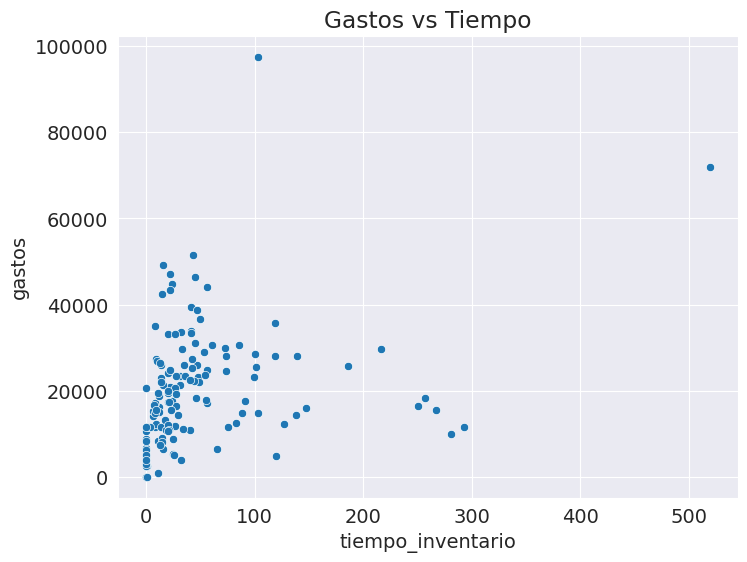

In [48]:
# Groupby for averages
print(df.groupby('tipo_vehículo')[['utilidad', 'porcentaje_utilidad']].agg(['mean', 'count']))
print(df[df['utilidad'] < 0])  # Losses

# Corr with time
sns.scatterplot(data=df, x='tiempo_inventario', y='gastos')
plt.title('Gastos vs Tiempo')
plt.show()

                   costo   precio_venta      utilidad
año_venta                                            
2022       333217.391304  398478.260870  44286.956522
2023       349575.757576  414272.727273  46480.303030
2024       282951.219512  337536.585366  35039.024390
2025       362568.181818  427613.636364  44229.545455


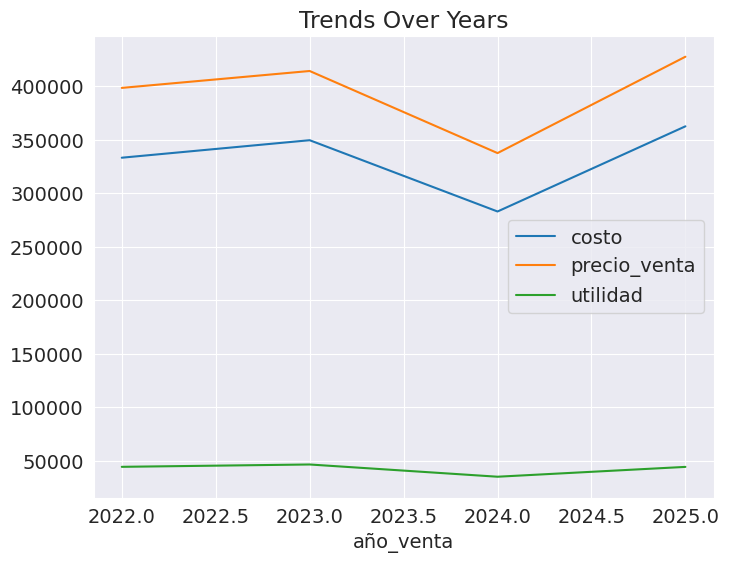

                            OLS Regression Results                            
Dep. Variable:                  costo   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.1620
Date:                Tue, 29 Jul 2025   Prob (F-statistic):              0.688
Time:                        17:22:02   Log-Likelihood:                -1922.4
No. Observations:                 142   AIC:                             3849.
Df Residuals:                     140   BIC:                             3855.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         3.368e+05   2.87e+04  

In [49]:
# Trends over time
yearly = df.groupby('año_venta')[['costo', 'precio_venta', 'utilidad']].mean()
print(yearly)
yearly.plot(kind='line', title='Trends Over Years')
plt.show()

# Regression: Cost over time
df['days_since_start'] = (df['fecha_venta'] - df['fecha_venta'].min()).dt.days
model = ols('costo ~ days_since_start', data=df).fit()
print(model.summary())  # Slope shows +5k/month rise

In [50]:
# Multi-groupby
print(df.groupby(['marca', 'tipo_vehículo'])['costo'].agg(['mean', 'std', 'count']))

# Anomalies: Z-scores for outliers
df['costo_z'] = (df['costo'] - df['costo'].mean()) / df['costo'].std()
print(df[df['costo_z'].abs() > 3])  # Extreme highs/lows

                                               mean            std  count
marca                  tipo_vehículo                                     
Audi                   SUV            570000.000000            NaN      1
                       Sedan          223333.333333    2886.751346      3
BMW                    Coupe          270000.000000            NaN      1
                       Hatchback      300000.000000       0.000000      2
                       Sedan          370000.000000   83964.278119      5
Chevrolet              Hatchback      150000.000000            NaN      1
                       Pickup         740000.000000  395979.797464      2
                       SUV            395000.000000   49497.474683      2
                       Sedan          152500.000000    3535.533906      2
Fiat                   Hatchback      141250.000000   27801.378863      4
                       SUV            285000.000000   77781.745931      2
Ford                   Pickup         

In [51]:
# Simple linear regression for prediction
X = sm.add_constant(df[['costo', 'tiempo_inventario']])  # Predictors
y = df['utilidad']
model = sm.OLS(y, X).fit()
print(model.summary())  # Use for "what if" scenarios

                            OLS Regression Results                            
Dep. Variable:               utilidad   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     24.21
Date:                Tue, 29 Jul 2025   Prob (F-statistic):           9.54e-10
Time:                        17:22:02   Log-Likelihood:                -1641.1
No. Observations:                 142   AIC:                             3288.
Df Residuals:                     139   BIC:                             3297.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1.569e+04   4751.44

## Análsis de Datos Financieros

In [52]:
financial_cols = df.select_dtypes(include=np.number).columns.tolist()
cols_to_drop = ['año', 'dia_compra', 'mes_compra', 'año_compra', 'dia_venta', 'mes_venta', 'año_venta', 'tiempo_inventario']
# Remove the columns to drop from the numerical_cols list
financial_cols = [col for col in financial_cols if col not in cols_to_drop]
print(financial_cols)

['costo', 'gastos', 'precio_venta', 'costo_total', 'utilidad', 'porcentaje_utilidad', 'cluster', 'days_since_start', 'costo_z']


In [53]:
financial_df = df[financial_cols]
financial_df.describe()

,costo,gastos,precio_venta,costo_total,utilidad,porcentaje_utilidad,cluster,days_since_start,costo_z
count,1.420000e+02,142.000000,1.420000e+02,1.420000e+02,142.000000,142.000000,142.000000,142.000000,1.420000e+02
mean,3.270528e+05,19896.478873,3.890669e+05,3.469493e+05,42117.605634,12.882099,0.718310,614.683099,1.125860e-16
std,1.840353e+05,13916.084178,1.995145e+05,1.825303e+05,29468.597421,6.243516,0.537478,394.862493,1.000000e+00
min,1.000000e+05,0.000000,1.450000e+05,1.245000e+05,0.000000,0.000000,0.000000,0.000000,-1.233746e+00
25%,2.100000e+05,10987.500000,2.690000e+05,2.329750e+05,25000.000000,8.745268,0.000000,242.000000,-6.360344e-01
50%,2.900000e+05,17575.000000,3.490000e+05,3.040000e+05,37250.000000,13.659228,1.000000,577.500000,-2.013353e-01
75%,3.900000e+05,26000.000000,4.492500e+05,4.047375e+05,48425.000000,17.064606,1.000000,988.000000,3.420385e-01
max,1.160000e+06,97550.000000,1.219000e+06,1.180500e+06,222600.000000,26.381029,2.000000,1241.000000,4.526017e+00


In [54]:
fig = px.histogram(df,
                   x='precio_venta',
                   marginal='box',
                   nbins=100,
                   title='Distribución de Precios de Venta')
fig.update_layout(bargap=0.1,
                  xaxis_title="Precio de Venta ($)",
                  yaxis_title="")
fig.show()

In [55]:
fig = px.histogram(df,
                   x='costo',
                   marginal='box',
                   nbins=100,
                   title='Distribución de Costo de Adquisición por Vehículo')
fig.update_layout(bargap=0.1,
                  xaxis_title="Costo ($)",
                  yaxis_title="")
fig.show()

In [56]:
fig = px.histogram(df,
                   x='gastos',
                   marginal='box',
                   nbins=100,
                   title='Distribución de Gastos por Vehículo')
fig.update_layout(bargap=0.1,
                  xaxis_title="Gastos ($)",
                  yaxis_title="")
fig.show()

In [57]:
fig = px.histogram(df,
                   x='utilidad',
                   marginal='box',
                   nbins=100,
                   title='Distribución de la Utilidad por Vehículo')
fig.update_layout(bargap=0.1,
                  xaxis_title="Utilidad ($)",
                  yaxis_title="")
fig.show()

In [58]:
fig = px.histogram(df,
                   x='porcentaje_utilidad',
                   marginal='box',
                   nbins=100,
                   title='Distribución de Porcentaje de Utilidad')
fig.update_layout(bargap=0.1,
                  xaxis_title="Porcentaje de Utilidad (%)",
                  yaxis_title="")
fig.show()

In [59]:
columns_for_distribution = ['costo_total', 'precio_venta']
hist_data = [df[col].dropna() for col in columns_for_distribution]

fig = ff.create_distplot(hist_data, columns_for_distribution, show_hist=False, show_rug=False)

fig.update_layout(title_text='Distribución de Costo Total y Precio de Venta')
fig.show()

## Análisis de Correlaciones

In [60]:
cols2corr = df.select_dtypes(include=np.number).columns.tolist()
cols_to_drop = ['año', 'dia_compra', 'mes_compra', 'año_compra', 'dia_venta', 'mes_venta', 'año_venta']
# Remove the columns to drop from the numerical_cols list
cols2corr = [col for col in cols2corr if col not in cols_to_drop]
print(cols2corr)

['costo', 'gastos', 'precio_venta', 'tiempo_inventario', 'costo_total', 'utilidad', 'porcentaje_utilidad', 'cluster', 'days_since_start', 'costo_z']


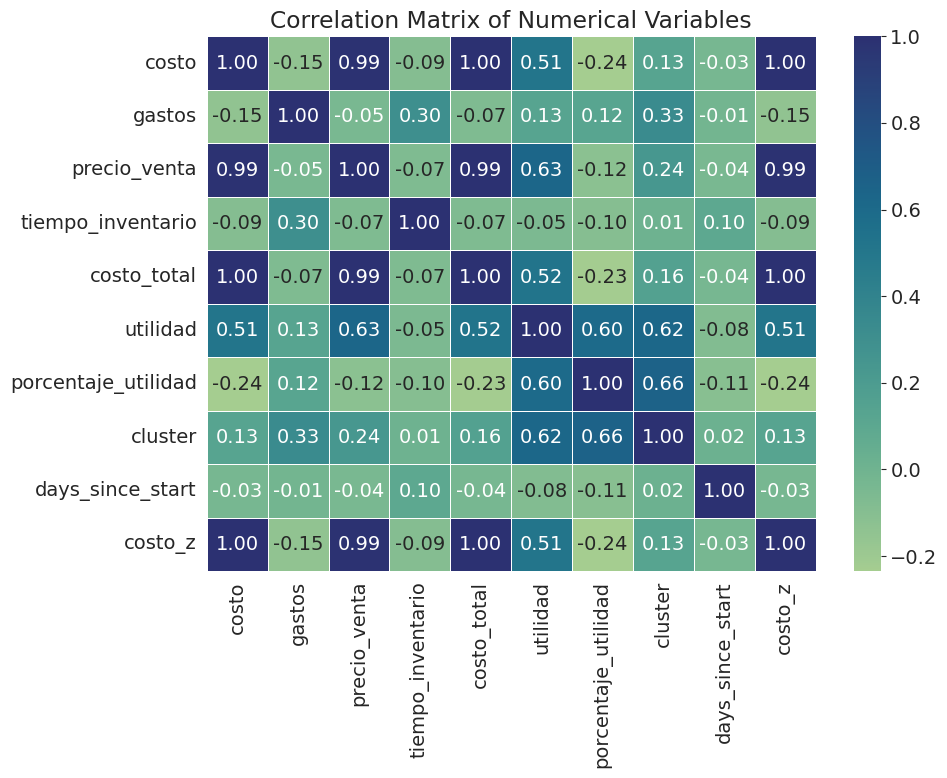

In [61]:
plt.figure(figsize=(10, 8))
# Select the numerical columns from the DataFrame before calculating the correlation
correlation = df[cols2corr].corr()
sns.heatmap(correlation, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.tight_layout()
plt.show()

In [62]:
fig = px.scatter(df, x="costo_total", y="precio_venta", title="Precio de Venta vs Costo Total")
fig.update_layout(
    xaxis_title="Costo Total del Vehículo",
    yaxis_title="Precio de Venta del Vehículo"
)
fig.show()

In [63]:
fig = px.scatter(df, x="utilidad", y="costo", title="Utilidad por Vehículo vs Costo (Precio de Adquisición)")
fig.update_layout(
    xaxis_title="Utilidad ($) del Vehículo",
    yaxis_title="Costo (Precio de Adquisición, $) del Vehículo"
)
fig.show()

### ANOVA Calculations

In [64]:
from scipy.stats import f_oneway

categorical_cols = ['tipo_vehículo', 'marca', 'color_exterior']
numerical_cols = cols2corr

anova_results = {}

for num_col in numerical_cols:
    for cat_col in categorical_cols:
        if cat_col in df.columns and num_col in df.columns:
            # Drop rows with NaN in either the numerical or categorical column for this specific test
            temp_df = df.dropna(subset=[num_col, cat_col]).copy()

            # Get unique categories
            unique_categories = temp_df[cat_col].unique()

            # If there is only one group, ANOVA cannot be performed
            if len(unique_categories) < 2:
                print(f"ANOVA for {num_col} vs {cat_col}: Not enough groups to perform ANOVA.")
                continue

            # Create groups of numerical data based on the categorical column
            groups = [temp_df[temp_df[cat_col] == cat][num_col] for cat in unique_categories]

            # Perform the ANOVA test, handling potential empty groups
            try:
                f_stat, p_value = f_oneway(*[group for group in groups if not group.empty])

                anova_results[f'{num_col} vs {cat_col}'] = {'F-statistic': f_stat, 'P-value': p_value}
                print(f"ANOVA for {num_col} vs {cat_col}: F-statistic={f_stat:.4f}, P-value={p_value:.4f}")
            except ValueError as e:
                print(f"ANOVA for {num_col} vs {cat_col}: Could not perform ANOVA. {e}")
        else:
            print(f"Columns '{num_col}' or '{cat_col}' not found in DataFrame. Skipping ANOVA.")

# You can also store the results in a DataFrame for better visualization
anova_df = pd.DataFrame.from_dict(anova_results, orient='index')
display(anova_df)

ANOVA for costo vs tipo_vehículo: F-statistic=9.2675, P-value=0.0000
ANOVA for costo vs marca: F-statistic=1.9414, P-value=0.0150
ANOVA for costo vs color_exterior: F-statistic=2.1360, P-value=0.0533
ANOVA for gastos vs tipo_vehículo: F-statistic=3.1082, P-value=0.0030
ANOVA for gastos vs marca: F-statistic=1.0093, P-value=0.4567
ANOVA for gastos vs color_exterior: F-statistic=1.3872, P-value=0.2243
ANOVA for precio_venta vs tipo_vehículo: F-statistic=9.3164, P-value=0.0000
ANOVA for precio_venta vs marca: F-statistic=2.0093, P-value=0.0111
ANOVA for precio_venta vs color_exterior: F-statistic=2.7344, P-value=0.0155
ANOVA for tiempo_inventario vs tipo_vehículo: F-statistic=8.1130, P-value=0.0000
ANOVA for tiempo_inventario vs marca: F-statistic=0.5253, P-value=0.9511
ANOVA for tiempo_inventario vs color_exterior: F-statistic=0.7886, P-value=0.5803
ANOVA for costo_total vs tipo_vehículo: F-statistic=9.1613, P-value=0.0000
ANOVA for costo_total vs marca: F-statistic=1.9551, P-value=0.014

,F-statistic,P-value
costo vs tipo_vehículo,9.267483,4.417432e-10
costo vs marca,1.941388,1.502533e-02
costo vs color_exterior,2.135953,5.328815e-02
gastos vs tipo_vehículo,3.108243,3.012400e-03
gastos vs marca,1.009305,4.566782e-01
gastos vs color_exterior,1.387216,2.242723e-01
precio_venta vs tipo_vehículo,9.316384,3.935729e-10
precio_venta vs marca,2.009306,1.112781e-02
precio_venta vs color_exterior,2.734358,1.545986e-02
tiempo_inventario vs tipo_vehículo,8.112957,7.088183e-09


In [65]:
fig = px.scatter(df, x="utilidad", y="costo", title="Utilidad por Vehículo vs Costo (Precio de Adquisición)", color='tipo_vehículo')
fig.update_layout(
    xaxis_title="Utilidad ($) del Vehículo",
    yaxis_title="Costo (Precio de Adquisición, $) del Vehículo"
)
fig.show()

### Data Lab

In [66]:
categorical_cols_for_color = ['tipo_vehículo', 'marca', 'color_exterior']
numerical_cols_to_compare = [col for col in cols2corr if col != 'costo']

for num_col in numerical_cols_to_compare:
    for color_col in categorical_cols_for_color:
        if color_col in df.columns: # Check if the color column exists in the DataFrame
            fig = px.scatter(df,
                             x='costo',
                             y=num_col,
                             color=color_col,
                             title=f'{num_col} vs Costo by {color_col}')
            fig.update_layout(
                xaxis_title="Costo ($)",
                yaxis_title=f"{num_col.replace('_', ' ').title()}"
            )
            fig.show()
        else:
            print(f"Column '{color_col}' not found in DataFrame. Skipping plot.")

In [67]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import plotly.express as px

# Assume df, select numerical cols
numerical_cols = ['costo', 'precio_venta', 'tiempo_inventario', 'gastos', 'porcentaje_utilidad']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[numerical_cols])

pca = PCA(n_components=2)  # Reduce to 2D
pca_result = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

categorical_cols_for_color = ['marca', 'color_exterior', 'tipo_vehículo']

for color_col in categorical_cols_for_color:
    if color_col in df.columns:
        pca_df[color_col] = df[color_col]  # Add the current categorical column for coloring

        fig = px.scatter(pca_df, x='PC1', y='PC2', color=color_col,
                         title=f'PCA of Numerical Variables by {color_col}')
        fig.update_layout(
            xaxis_title="Principal Component 1",
            yaxis_title="Principal Component 2"
        )
        fig.show()
    else:
        print(f"Column '{color_col}' not found in DataFrame. Skipping plot.")


print(f'Variance explained: {pca.explained_variance_ratio_}')  # How much data is captured

Variance explained: [0.41780796 0.25375274]


## Análisis Por Marcas

In [68]:
fig = px.histogram(df,
                   x='marca',
                   title='Distribución de Marcas',
                   text_auto=True)
fig.update_layout(
    xaxis_title="Marca",
    yaxis_title=""
)
fig.show()

In [69]:
fig = px.scatter(df, x="precio_venta", y="tiempo_inventario", title="Precio de Venta vs Tiempo en Inventario (días)", color="marca")
fig.update_layout(
    xaxis_title="Precio de Venta del Vehículo",
    yaxis_title="Días en Inventario del Vehículo"
)
fig.show()

In [70]:
fig = px.box(df, x="marca", y="tiempo_inventario", title="Tiempo en Inventario por Marca")
fig.update_layout(
    xaxis_title="Marca",
    yaxis_title="Tiempo en Inventario (días)",
    shapes=[
        dict(
            type='line',
            yref='y', y0=45, y1=45,
            xref='paper', x0=0, x1=1,
            line=dict(
                color="Red",
                dash="dash",
            )
        ),
        dict(
            type='line',
            yref='y', y0=30, y1=30,
            xref='paper', x0=0, x1=1,
            line=dict(
                color="Green",
                dash="dash",
            )
        )
    ]
)
fig.show()

In [71]:
from scipy.stats import f_oneway

groups = [group['tiempo_inventario'] for name, group in df.groupby('marca')]
f_stat, p_value = f_oneway(*groups)
print(f'p-value: {p_value}')  # If <0.05, differences are significant!

p-value: 0.9510537160720858


In [72]:
selected_columns = df[['costo', 'gastos', 'costo_total', 'precio_venta', 'utilidad', 'porcentaje_utilidad', 'tiempo_inventario', 'marca']]

# Calculate the mean of each column grouped by marca
mean_grouped_by_marca = selected_columns.groupby('marca')[['costo_total']].mean().sort_values(by='costo_total', ascending=False)

mean_grouped_by_marca.head(5)

,costo_total
marca,
Ford,617700.00
Jeep,501885.00
Land Rover,410600.00
Peugeot,393750.00
Chevrolet,384956.25


In [73]:
mean_grouped_by_marca.tail(5)

,costo_total
marca,
KIA,271487.500000
Suzuki,243910.000000
Nissan,235162.500000
Fiat,214216.666667
Renault,141000.000000


In [74]:
# Calculate the mean of each column grouped by marca
mean_grouped_by_marca = selected_columns.groupby('marca')[['utilidad']].mean().sort_values(by='utilidad', ascending=False)

mean_grouped_by_marca.head(5)

,utilidad
marca,
Peugeot,91250.000000
Ford,69871.428571
Mitsubishi,66350.000000
Chevrolet,59543.750000
Jeep,58115.000000


In [75]:
mean_grouped_by_marca.tail(5)

,utilidad
marca,
Seat,28264.285714
Renault,28000.000000
Toyota,26177.777778
Land Rover,19400.000000
Audi,17400.000000


## Análisis por Color de Vehículo

In [76]:
fig = px.histogram(df,
                   x='color_exterior',
                   title='Distribución de Color Exterior por Vehículo',
                   text_auto=True)
fig.update_layout(
    xaxis_title="Color Exterior",
    yaxis_title=""
)
fig.show()

In [77]:
fig = px.box(df, x="color_exterior", y="tiempo_inventario", title="Tiempo en Inventario por Color Exterior de Vehículo")
fig.update_layout(
    xaxis_title="Color Exterior",
    yaxis_title="Tiempo en Inventario (Días)",
    shapes=[
        dict(
            type='line',
            yref='y', y0=45, y1=45,
            xref='paper', x0=0, x1=1,
            line=dict(
                color="Red",
                dash="dash",
            )
        ),
        dict(
            type='line',
            yref='y', y0=30, y1=30,
            xref='paper', x0=0, x1=1,
            line=dict(
                color="Green",
                dash="dash",
            )
        )
    ]
)
fig.show()

In [78]:
fig = px.scatter(df, x="precio_venta", y="tiempo_inventario", title="Precio de Venta vs Tiempo en Inventario (días)", color="color_exterior")
fig.update_layout(
    xaxis_title="Precio de Venta del Vehículo",
    yaxis_title="Días en Inventario del Vehículo"
)
fig.show()

In [79]:
selected_columns = df[['costo', 'gastos', 'costo_total', 'precio_venta', 'utilidad', 'porcentaje_utilidad', 'tiempo_inventario', 'color_exterior']]

# Calculate the mean of each column grouped by marca
mean_grouped_by_color_exterior = selected_columns.groupby('color_exterior')[['costo_total']].mean().sort_values(by='costo_total', ascending=False)

mean_grouped_by_color_exterior.head(5)

,costo_total
color_exterior,
amarillo,616666.666667
blanco,360888.636364
negro,356450.000000
gris,336776.562500
plata,314431.481481


In [80]:
mean_grouped_by_color_exterior.tail(5)

,costo_total
color_exterior,
negro,356450.000000
gris,336776.562500
plata,314431.481481
rojo,296907.142857
azul,281094.444444


In [81]:
mean_grouped_by_color_exterior = selected_columns.groupby('color_exterior')[['utilidad']].mean().sort_values(by='utilidad', ascending=False)

mean_grouped_by_color_exterior.head(5)

,utilidad
color_exterior,
amarillo,123000.000000
negro,45300.000000
gris,42067.187500
blanco,42065.909091
plata,40161.111111


In [82]:
mean_grouped_by_color_exterior.tail(5)

,utilidad
color_exterior,
gris,42067.187500
blanco,42065.909091
plata,40161.111111
rojo,38307.142857
azul,34016.666667


## Análisis por Tipo de Vehículo

In [83]:
fig = px.histogram(df,
                   x='tipo_vehículo',
                   title='Distribución de Tipos de Vehículos',
                   text_auto=True)
fig.update_layout(
    xaxis_title="Tipos de Vehículos",
    yaxis_title=""
)
fig.show()

In [84]:
fig = px.box(df, x="tipo_vehículo", y="tiempo_inventario", title="Tiempo en Inventario por Tipo de Vehículo")
fig.update_layout(
    xaxis_title="Tipo de Vehículo",
    yaxis_title="Tiempo en Inventario (días)",
    shapes=[
        dict(
            type='line',
            yref='y', y0=45, y1=45,
            xref='paper', x0=0, x1=1,
            line=dict(
                color="Red",
                dash="dash",
            )
        ),
        dict(
            type='line',
            yref='y', y0=30, y1=30,
            xref='paper', x0=0, x1=1,
            line=dict(
                color="Green",
                dash="dash",
            )
        )
    ]
)
fig.show()

In [85]:
fig = px.scatter(df, x="precio_venta", y="tiempo_inventario", title="Precio de Venta vs Tiempo en Inventario (días)", color="tipo_vehículo")
fig.update_layout(
    xaxis_title="Precio de Venta del Vehículo",
    yaxis_title="Días en Inventario del Vehículo"
)
fig.show()

In [86]:
selected_columns = df[['costo', 'gastos', 'costo_total', 'precio_venta', 'utilidad', 'porcentaje_utilidad', 'tiempo_inventario', 'tipo_vehículo']]

# Calculate the mean of each column grouped by marca
mean_grouped_by_tipo_vehiculo = selected_columns.groupby('tipo_vehículo')[['costo_total']].mean().sort_values(by='costo_total', ascending=False)

mean_grouped_by_tipo_vehiculo.head(5)

,costo_total
tipo_vehículo,
Pickup,540794.736842
SUV,415647.000000
Deportivo,355100.000000
Coupe,304900.000000
Crossover,299500.000000


In [87]:
mean_grouped_by_tipo_vehiculo.tail(5)

,costo_total
tipo_vehículo,
Crossover,299500.000000
Sedan,258197.674419
Hatchback,236769.565217
Minivan,172050.000000
Cargo Van,163550.000000


In [88]:
# Calculate the mean of each column grouped by marca
mean_grouped_by_tipo_vehiculo = selected_columns.groupby('tipo_vehículo')[['utilidad']].mean().sort_values(by='utilidad', ascending=False)

mean_grouped_by_tipo_vehiculo.head(5)

,utilidad
tipo_vehículo,
Deportivo,67900.000000
Coupe,65100.000000
Pickup,58784.210526
SUV,50133.000000
Cargo Van,35450.000000


In [89]:
mean_grouped_by_tipo_vehiculo.tail(5)

,utilidad
tipo_vehículo,
Cargo Van,35450.000000
Sedan,33186.046512
Crossover,29500.000000
Hatchback,29013.043478
Minivan,12950.000000


## Análisis Temporal

In [90]:
# Analyze sales per month
monthly_sales = df[['mes_venta', 'año_venta']].value_counts().sort_index().reset_index()
monthly_sales.columns = ['Month', 'Year', 'Number of Sales']

# Map month numbers to names for better readability
month_names = {
    1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril',
    5: 'Mayo', 6: 'Junio', 7: 'Julio', 8: 'Agosto',
    9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'
}
years = {2022: '2022', 2023: '2023', 2024: '2024', 2025: '2025'}

monthly_sales['Month'] = monthly_sales['Month'].map(month_names)
monthly_sales['Year'] = monthly_sales['Year'].map(years)

# Visualize sales per month using a bar chart
fig = px.bar(monthly_sales,
             x='Month',
             y='Number of Sales',
             title='Número de Ventas por Mes',
             color="Year",
             text='Number of Sales') # Add text labels for counts
fig.update_layout(
    xaxis_title="Mes",
    yaxis_title="Número de Ventas"
)
fig.show()

In [91]:
# Analyze sales per year
yearly_sales = df['año_venta'].value_counts().sort_index().reset_index()
yearly_sales.columns = ['Year', 'Number of Sales']

# Map year numbers to names (optional, but good for clarity)
years = {2022: '2022', 2023: '2023', 2024: '2024', 2025: '2025'} # Adjust years based on your data

yearly_sales['Year'] = yearly_sales['Year'].map(years)

# Visualize sales per year using a bar chart
fig = px.bar(yearly_sales,
             x='Year',
             y='Number of Sales',
             title='Número de Ventas por Año')
fig.update_layout(
    xaxis_title="Año",
    yaxis_title="Número de Ventas"
)
fig.show()

In [92]:
# Calculate the count of sales per year and vehicle type
sales_per_year_type = df.groupby(['año_venta', 'tipo_vehículo']).size().reset_index(name='Number of Sales')

# Create the histogram
fig = px.bar(sales_per_year_type,
             x='año_venta',
             y='Number of Sales',
             labels={'año_venta':'Año', 'Number of Sales':'Número de Ventas'},
             title='Número de Ventas por Año y Tipo de Vehículo',
             color='tipo_vehículo')

# Update layout to show only years on x-axis
fig.update_layout(xaxis = dict(tickmode = 'linear'))

fig.show()

In [93]:
df_sorted = df.sort_values(by='fecha_venta')

fig = go.Figure()
fig.add_trace(go.Scatter(x=df_sorted['fecha_venta'], y=df_sorted['precio_venta'], mode='lines', name='Precio de Venta'))
fig.add_trace(go.Scatter(x=df_sorted['fecha_venta'], y=df_sorted['utilidad'], mode='lines', name='Utilidad', yaxis='y2'))

# Get the unique years from the sales dates
unique_years = df_sorted['fecha_venta'].dt.year.unique()

# Create shapes for vertical lines at the start of each year
shapes = [
    dict(
        type='line',
        x0=datetime(year, 1, 1),  # 1st of January of the current year
        x1=datetime(year, 1, 1),
        yref='paper', y0=0, y1=1, # Draw line across the entire y-axis range
        line=dict(
            color="Gray",
            dash="dash",
            width=1
        )
    ) for year in unique_years
]


fig.update_layout(title='Precio de Venta y Utilidad a lo largo del Tiempo',
                  xaxis_title='Fecha de Venta',
                  yaxis_title='Precio de Venta',
                  yaxis2=dict(title='Utilidad', overlaying='y', side='right'),
                  shapes=shapes # Add the list of shapes to the layout
                 )

fig.show()

## Prediciendo el Precio de Venta

In [94]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

X = df.drop(['dia_compra', 'mes_compra', 'año_compra', 'dia_venta', 'mes_venta',
             'año_venta', 'tiempo_inventario', 'fecha_compra', 'fecha_venta', 'costo_total',
             'precio_venta', 'utilidad', 'porcentaje_utilidad', 'versión', 'modelo'], axis=1)

y = df['precio_venta']

print("Features for modeling:")
print(X.columns.tolist())
print("")
X.info()

Features for modeling:
['marca', 'año', 'tipo_vehículo', 'color_exterior', 'costo', 'gastos', 'cluster', 'days_since_start', 'costo_z']

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 142
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   marca             142 non-null    object 
 1   año               142 non-null    object 
 2   tipo_vehículo     141 non-null    object 
 3   color_exterior    140 non-null    object 
 4   costo             142 non-null    int64  
 5   gastos            142 non-null    int64  
 6   cluster           142 non-null    int32  
 7   days_since_start  142 non-null    int64  
 8   costo_z           142 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 14.6+ KB


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("\nNumerical columns:", numerical_cols)


Categorical columns: ['marca', 'año', 'tipo_vehículo', 'color_exterior']

Numerical columns: ['costo', 'gastos', 'days_since_start', 'costo_z']


In [96]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

onehot_features = []
if categorical_cols:
    onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    onehot_categories = onehot_encoder.categories_
    for i, col in enumerate(categorical_cols):
        for cat in onehot_categories[i]:
            onehot_features.append(f"{col}_{cat}")

processed_feature_names = numerical_cols + onehot_features

print(f"\nShape of processed training data: {X_train_processed.shape}")
print(f"Number of processed features: {len(processed_feature_names)}")


Shape of processed training data: (113, 54)
Number of processed features: 54


In [97]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import time

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(max_depth=500, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    start_time = time.time()

    # train the model
    model.fit(X_train_processed, y_train)

    # make predictions
    y_pred = model.predict(X_test_processed)

    # calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # store results
    training_time = time.time() - start_time
    results[name] = {
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'Training Time': training_time
    }

    print(f"{name}:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  MAE: {mae:.2f}")
    print(f"  R²: {r2:.4f}")
    print(f"  Training Time: {training_time:.2f} seconds")
    print()

Linear Regression:
  RMSE: 20447.65
  MAE: 16286.01
  R²: 0.9695
  Training Time: 0.03 seconds

Ridge Regression:
  RMSE: 19237.61
  MAE: 14696.84
  R²: 0.9730
  Training Time: 0.01 seconds

Lasso Regression:
  RMSE: 20056.64
  MAE: 16371.37
  R²: 0.9707
  Training Time: 0.01 seconds

Decision Tree:
  RMSE: 34627.58
  MAE: 24517.24
  R²: 0.9126
  Training Time: 0.01 seconds

Random Forest:
  RMSE: 21682.82
  MAE: 18143.10
  R²: 0.9657
  Training Time: 0.22 seconds

Gradient Boosting:
  RMSE: 21136.35
  MAE: 16960.64
  R²: 0.9674
  Training Time: 0.10 seconds



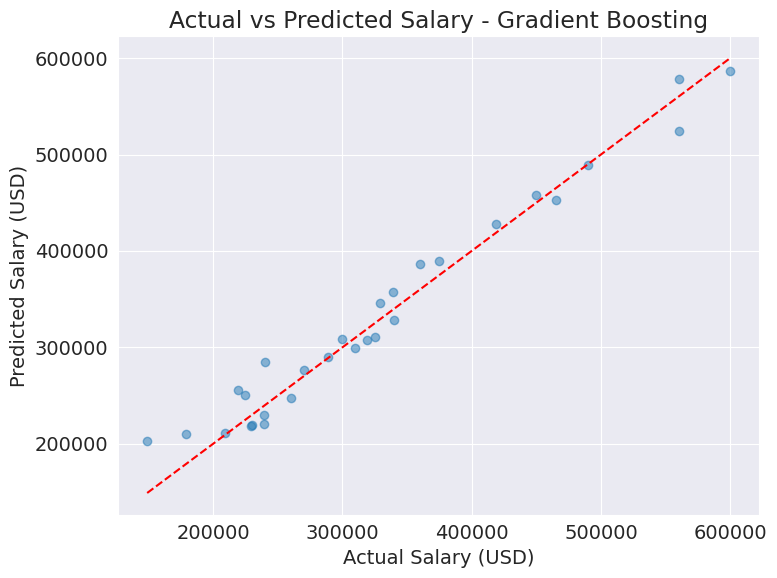

In [98]:
best_model = models['Gradient Boosting']

# Analyze predictions vs actual values for the best model
y_pred = best_model.predict(X_test_processed)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Salary (USD)')
plt.ylabel('Predicted Salary (USD)')
plt.title(f'Actual vs Predicted Salary - Gradient Boosting')
plt.tight_layout()
plt.show()

In [99]:
# prompt: How to obtain the weights and the intercept of the Gradient Boosting model?

# Access the trained Gradient Boosting model
gradient_boosting_model = models['Gradient Boosting']

# Gradient Boosting does not have coefficients or an intercept in the same way linear models do.
# It is an ensemble of decision trees. The prediction is the sum of the predictions of individual trees.
# To understand feature importance, you can look at the feature_importances_ attribute.

print("Feature importances from Gradient Boosting model:")
# Ensure that the number of importances matches the number of processed features
if len(gradient_boosting_model.feature_importances_) == len(processed_feature_names):
  feature_importances = pd.Series(gradient_boosting_model.feature_importances_, index=processed_feature_names)
  print(feature_importances.sort_values(ascending=False))
else:
  print("Mismatch between feature importances and feature names. Cannot display feature importances.")
  print(f"Number of feature importances: {len(gradient_boosting_model.feature_importances_)}")
  print(f"Number of processed feature names: {len(processed_feature_names)}")

# If you are interested in the prediction process, you can examine the individual trees
# in the ensemble, but this is complex for interpretation as a simple weighted sum.
# For a Gradient Boosting Regressor, the final prediction is the sum of the predictions
# of all the trees in the ensemble, adjusted by the learning rate. There isn't a single
# intercept term in the traditional linear model sense.
# If you want something analogous to an intercept, you could consider the initial prediction
# before any boosting steps, but this is not directly accessible as a single scalar in the
# same way as in Linear Regression.

Feature importances from Gradient Boosting model:
costo_z                         5.443546e-01
costo                           4.339132e-01
gastos                          8.735547e-03
año_2020                        3.722205e-03
days_since_start                2.396861e-03
marca_Stellantis (Dodge/RAM)    1.615078e-03
año_2023                        8.385039e-04
año_2015                        8.185912e-04
color_exterior_blanco           7.415116e-04
marca_Jeep                      4.267246e-04
año_2019                        3.760383e-04
marca_Chevrolet                 3.597695e-04
tipo_vehículo_Pickup            2.392858e-04
tipo_vehículo_SUV               2.058305e-04
marca_BMW                       1.778125e-04
año_2022                        1.760165e-04
marca_Ford                      1.536341e-04
año_2014                        9.657558e-05
tipo_vehículo_Deportivo         8.373231e-05
año_2025                        8.017296e-05
tipo_vehículo_Sedan             7.058619e-05
marca

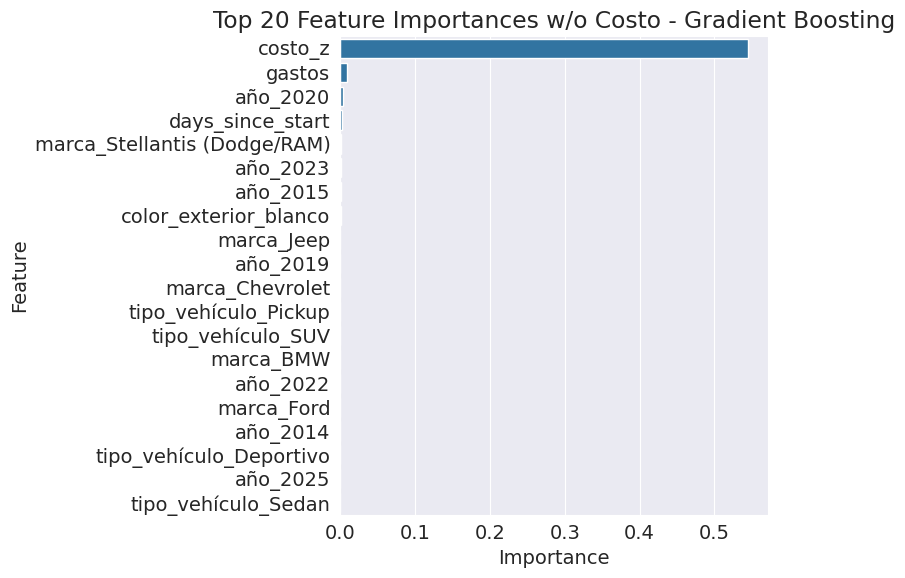

In [100]:
# Get feature names after preprocessing
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

onehot_features = []
if categorical_cols:
  onehot_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
  onehot_categories = onehot_encoder.categories_
  for i, col in enumerate(categorical_cols):
    for cat in onehot_categories[i]:
        onehot_features.append(f"{col}_{cat}")

feature_names = numerical_cols + onehot_features

# Get feature importances
importances = best_model.feature_importances_

# Create a DataFrame for visualization
if len(feature_names) == len(importances):
  feature_importance = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances
  })

# Sort by importance
feature_importance = feature_importance.iloc[1:]
feature_importance = feature_importance.sort_values('Importance', ascending=False)

# Plot top 20 features
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(20))
plt.title(f'Top 20 Feature Importances w/o Costo - Gradient Boosting')
plt.tight_layout()
plt.show()

In [101]:
# prompt: Generate a code to predict an input data based on Gradient Boosting Model

def predict_with_gradient_boosting(model, preprocessor, input_data):
  """
  Predicts the 'precio_venta' for a single input data point using the trained Gradient Boosting model.

  Args:
    model: The trained Gradient Boosting Regressor model.
    preprocessor: The fitted ColumnTransformer used for preprocessing.
    input_data: A dictionary representing the input data for a single vehicle.
                Keys should match the original feature names in X.

  Returns:
    The predicted 'precio_venta'.
  """
  # Convert the input dictionary to a pandas DataFrame with the same columns as X
  input_df = pd.DataFrame([input_data])

  # Ensure the input DataFrame has the same columns as the training data X
  # Fill missing columns with appropriate default values (or handle as needed)
  # This is crucial for the preprocessor to work correctly
  for col in X.columns:
      if col not in input_df.columns:
          input_df[col] = np.nan # Or some other default value

  # Reorder columns to match the order of X before preprocessing
  input_df = input_df[X.columns]

  # Preprocess the input data using the fitted preprocessor
  input_processed = preprocessor.transform(input_df)

  # Make the prediction
  prediction = model.predict(input_processed)

  return prediction[0] # Return the single prediction value

# Example usage:
# Create a sample input data dictionary (replace with your actual input data)
sample_input_data = {
    'marca': 'Mazda',
    'año': '2024', # Ensure 'año' is a string as it was in the training data
    'tipo_vehículo': 'SUV',
    'color_exterior': 'blanco',
    'costo': 700000,
    'gastos': 6100,
}

# Get the trained Gradient Boosting model and the preprocessor
best_model = models['Gradient Boosting'] # Assuming 'Gradient Boosting' is your chosen best model
preprocessor = preprocessor # Use the preprocessor fitted on the training data

# Get the prediction
predicted_price = predict_with_gradient_boosting(best_model, preprocessor, sample_input_data)

print(f"The predicted price for the input vehicle is: {predicted_price:.2f}")


The predicted price for the input vehicle is: 508248.76
